In [1]:
import pandas as pd
import numpy as np


In [2]:
covid_word = pd.read_csv('../input/covidowid/owid-covid-data (1).csv')
covid_word

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165403,ZWE,Africa,Zimbabwe,2022-02-25,235467.0,500.0,348.143,5392.0,2.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
165404,ZWE,Africa,Zimbabwe,2022-02-26,235803.0,336.0,368.429,5393.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
165405,ZWE,Africa,Zimbabwe,2022-02-27,235803.0,0.0,350.143,5393.0,0.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
165406,ZWE,Africa,Zimbabwe,2022-02-28,236380.0,577.0,401.286,5395.0,2.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


Let's study our DataSet. As you can see, it consist of 159321 rows × 67 columns. There is some missing data are observed in the DataSet. We should be sure that Python recognized types of data correctly.


In [3]:
covid_word.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165408 entries, 0 to 165407
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    165408 non-null  object 
 1   continent                                   155504 non-null  object 
 2   location                                    165408 non-null  object 
 3   date                                        165408 non-null  object 
 4   total_cases                                 162378 non-null  float64
 5   new_cases                                   162230 non-null  float64
 6   new_cases_smoothed                          160247 non-null  float64
 7   total_deaths                                144574 non-null  float64
 8   new_deaths                                  144611 non-null  float64
 9   new_deaths_smoothed                         142515 non-null  float64
 

As you can see, 66 columns of COVID-19 data were recognized correctly (float64). First 4 columns and tests_units were recognized as objects. Let's investigate them:


In [4]:
fields = ['iso_code', 'continent', 'location', 'tests_units']
covid_word[fields]

,iso_code,continent,location,tests_units
0,AFG,Asia,Afghanistan,NaN
1,AFG,Asia,Afghanistan,NaN
2,AFG,Asia,Afghanistan,NaN
3,AFG,Asia,Afghanistan,NaN
4,AFG,Asia,Afghanistan,NaN
...,...,...,...,...
165403,ZWE,Africa,Zimbabwe,tests performed
165404,ZWE,Africa,Zimbabwe,tests performed
165405,ZWE,Africa,Zimbabwe,tests performed
165406,ZWE,Africa,Zimbabwe,NaN


Let's show information about the field date.


In [5]:
covid_word['date']

0         2020-02-24
1         2020-02-25
2         2020-02-26
3         2020-02-27
4         2020-02-28
             ...    
165403    2022-02-25
165404    2022-02-26
165405    2022-02-27
165406    2022-02-28
165407    2022-03-01
Name: date, Length: 165408, dtype: object

### Сhange the data types of columns


As you can see, the columns: 'iso_code', 'continent', 'location', 'tests_units' have many repetitions and should be assigned to categorical fields **pandas.astype()**. 

The field 'data' should be converted into DataTime type **pandas.to_datetime**  
To see the results we can use **pandas.describe()**.


In [6]:
fields = ['iso_code', 'continent', 'location', 'tests_units']
covid_word[fields] =covid_word[fields].astype('category')
covid_word.loc[:, 'date'] = pd.to_datetime(covid_word['date'])
covid_word[fields].describe()

,iso_code,continent,location,tests_units
count,165408,155504,165408,85981
unique,238,6,238,4
top,ARG,Africa,Argentina,tests performed
freq,791,39197,791,62269


### Rows filtering


As we can see, the DataSet contains information about 6 continents and 238 countries.
The field 'tests_units' consist of 4 categories. To show a list of countries, we can use **pandas.Series.cat.categories**.


In [7]:
covid_word['location'].cat.categories

Index(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Uzbekistan', 'Vanuatu', 'Vatican', 'Venezuela', 'Vietnam',
       'Wallis and Futuna', 'World', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=238)

Let's investigate the dynamics of new cases of COVID-19 for a separate country. We will use India for saving models and further forecast. You can use your country. Let's use a pandas filter to do this.


In [8]:

c_covid = covid_word[covid_word['location'] == "India"]
c_covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
69295,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
69296,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
69297,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
69298,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
69299,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70052,IND,Asia,India,2022-02-25,42905844.0,11499.0,14762.714,513481.0,255.0,321.571,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
70053,IND,Asia,India,2022-02-26,42916117.0,10273.0,13377.714,513724.0,243.0,260.143,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
70054,IND,Asia,India,2022-02-27,42924130.0,8013.0,12229.429,513843.0,119.0,247.714,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
70055,IND,Asia,India,2022-02-28,42931045.0,6915.0,11302.286,514023.0,180.0,239.857,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN


### Elimination of missing data


As you can see, there are large fluctuations in the new cases plot. Let's try to make a forecast for these waves.
First of all, we should delete missing data using **pandas.DataFrame.dropna()**


### Data transformation


 To check for dependencies, it is necessary to perform a correlation analysis between them. This requires:

1.  duplicating of data and moving it vertically down for a certain number of days (lag)
2.  deleting the missing data at the beginning and end **pandas.DataFrame.shift()**
3.  calculating the correlation coefficient between the obtained series.

It is convenient to create a separate function for lag:


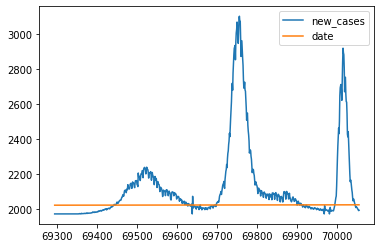

In [9]:
import matplotlib.pyplot as plt
fields = ['new_cases', 'date']
c_covid[fields].plot()
plt.show()

In [10]:
c_covid = c_covid[fields].dropna()
c_covid

,new_cases,date
69295,1.0,2020-01-30
69296,0.0,2020-01-31
69297,0.0,2020-02-01
69298,1.0,2020-02-02
69299,1.0,2020-02-03
...,...,...
70052,11499.0,2022-02-25
70053,10273.0,2022-02-26
70054,8013.0,2022-02-27
70055,6915.0,2022-02-28


Let's create a target DataSet.


In [11]:
y_dataset = c_covid[['new_cases','date']]
y_dataset

,new_cases,date
69295,1.0,2020-01-30
69296,0.0,2020-01-31
69297,0.0,2020-02-01
69298,1.0,2020-02-02
69299,1.0,2020-02-03
...,...,...
70052,11499.0,2022-02-25
70053,10273.0,2022-02-26
70054,8013.0,2022-02-27
70055,6915.0,2022-02-28


# Phophet

In [12]:
from fbprophet import Prophet

In [13]:
fb_confirm = y_dataset.rename(columns={'date': 'ds',
                        'new_cases': 'y'})

fb_confirm.head()

,y,ds
69295,1.0,2020-01-30
69296,0.0,2020-01-31
69297,0.0,2020-02-01
69298,1.0,2020-02-02
69299,1.0,2020-02-03


In [14]:
# evaluate prophet time series forecasting model on hold out dataset
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
# load data
df=fb_confirm
m = Prophet()
m.fit(df)

Initial log joint probability = -22.9903


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      75       1106.92    0.00716648       119.438   9.592e-05       0.001      135  LS failed, Hessian reset 
      99        1107.7    0.00718274       81.9743           1           1      162   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     123       1107.93   0.000161125       59.3405   2.446e-06       0.001      236  LS failed, Hessian reset 
     151       1108.02   0.000684647       66.2539   8.095e-06       0.001      319  LS failed, Hessian reset 
     199       1108.07   9.90012e-06       80.4482           1           1      386   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     267       1108.79    0.00124393       70.5795   1.457e-05       0.001      523  LS failed, Hessian reset 
     299       1108.88   2.96698e-05       77.1269      0.4355      0.4355      566   
    Iter      log p

In [15]:
future = m.make_future_dataframe(periods= 14, freq='D')
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail()
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-30,-27677.118292,-60408.357087,82281.084313,-27677.118292,-27677.118292,40562.542242,40562.542242,40562.542242,2716.970665,2716.970665,2716.970665,37845.571577,37845.571577,37845.571577,0.0,0.0,0.0,12885.423950
1,2020-01-31,-27481.916948,-63057.448720,75332.696934,-27481.916948,-27481.916948,33936.110914,33936.110914,33936.110914,2119.832241,2119.832241,2119.832241,31816.278673,31816.278673,31816.278673,0.0,0.0,0.0,6454.193966
2,2020-02-01,-27286.715604,-68538.772594,71486.111165,-27286.715604,-27286.715604,27434.724765,27434.724765,27434.724765,1915.727835,1915.727835,1915.727835,25518.996930,25518.996930,25518.996930,0.0,0.0,0.0,148.009161
3,2020-02-02,-27091.514260,-83707.550713,63081.390984,-27091.514260,-27091.514260,18100.425045,18100.425045,18100.425045,-949.055733,-949.055733,-949.055733,19049.480777,19049.480777,19049.480777,0.0,0.0,0.0,-8991.089216
4,2020-02-03,-26896.312917,-95921.516267,48665.523337,-26896.312917,-26896.312917,4931.540053,4931.540053,4931.540053,-7571.645684,-7571.645684,-7571.645684,12503.185737,12503.185737,12503.185737,0.0,0.0,0.0,-21964.772864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,2022-03-11,104663.109319,24684.725787,159604.462084,104618.751946,104719.860859,-14085.153697,-14085.153697,-14085.153697,2119.832241,2119.832241,2119.832241,-16204.985939,-16204.985939,-16204.985939,0.0,0.0,0.0,90577.955621
772,2022-03-12,104849.781877,18425.640275,163161.410220,104778.115144,104929.759958,-13684.591868,-13684.591868,-13684.591868,1915.727835,1915.727835,1915.727835,-15600.319703,-15600.319703,-15600.319703,0.0,0.0,0.0,91165.190009
773,2022-03-13,105036.454435,19016.333562,159192.060561,104944.218224,105143.907949,-16055.020556,-16055.020556,-16055.020556,-949.055733,-949.055733,-949.055733,-15105.964824,-15105.964824,-15105.964824,0.0,0.0,0.0,88981.433878
774,2022-03-14,105223.126993,11232.425505,152522.241572,105112.341075,105354.394963,-22271.709388,-22271.709388,-22271.709388,-7571.645684,-7571.645684,-7571.645684,-14700.063704,-14700.063704,-14700.063704,0.0,0.0,0.0,82951.417604


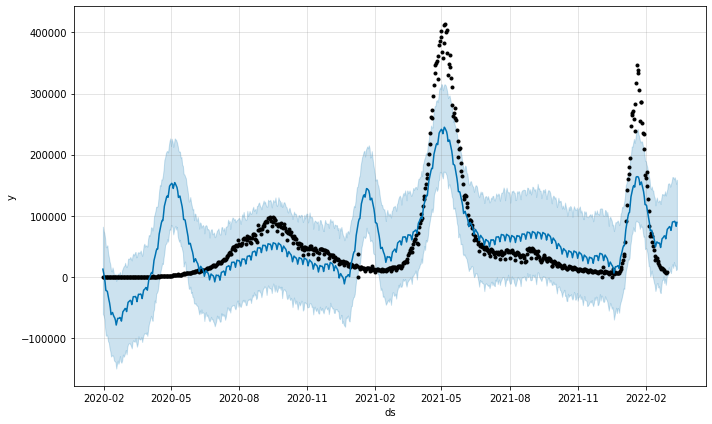

In [16]:
fig1 = m.plot(forecast)

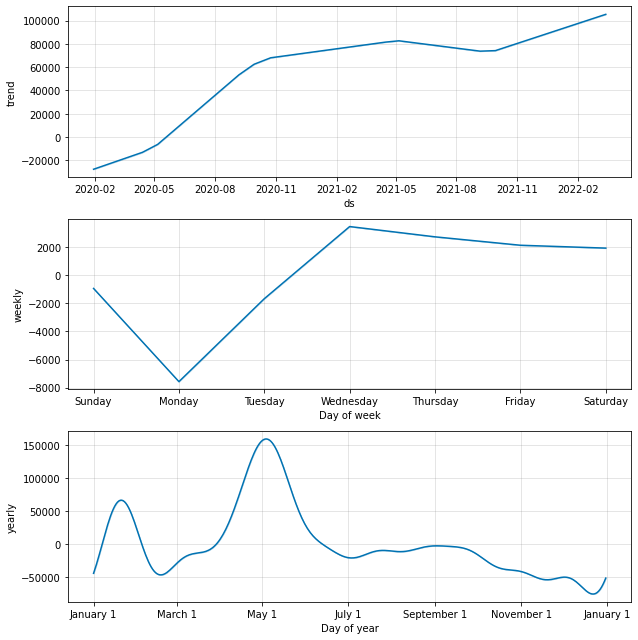

In [17]:
fig2 = m.plot_components(forecast)

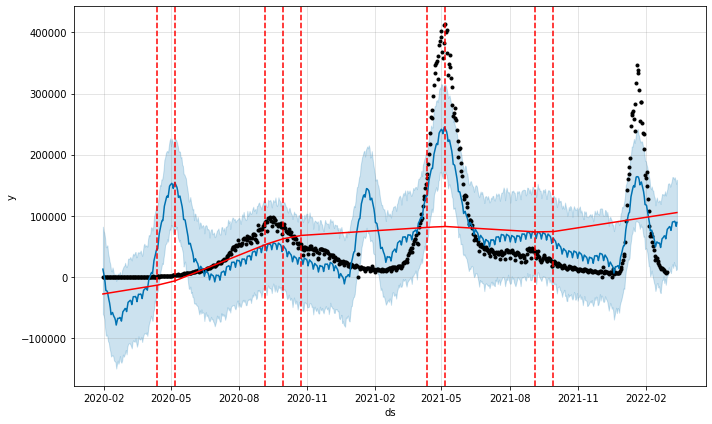

In [18]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)